In [2]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # center the data
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # compute the covariance matrix
        cov = np.cov(X, rowvar=False)

        # compute the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # sort the eigenvalues and eigenvectors in decreasing order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # store the first n_components eigenvectors as the principal components
        self.components = eigenvectors[:, : self.n_components]

    def transform(self, X):
        # center the data
        X = X - self.mean

        # project the data onto the principal components
        X_transformed = np.dot(X, self.components)

        return X_transformed

Let's pick an Example Dataset


In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_iris

# Load DataSet
wine_data = load_wine()
X, y = wine_data['data'], wine_data['target']

print(X.shape)
print(y.shape)

(178, 13)
(178,)


Plotting two random features of raw data


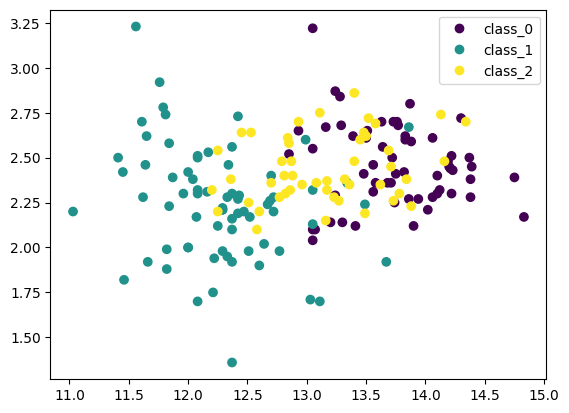

In [4]:
plot = plt.scatter(X[:,0], X[:,2], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

Applying PCA on raw data

In [5]:
# create a PCA object with 2 components
pca = PCA(n_components=2)

# fit the data
pca.fit(X)

# transform the data using the PCA object
X_transformed = pca.transform(X)

print(X_transformed.shape)

(178, 2)


Plotting PCA results


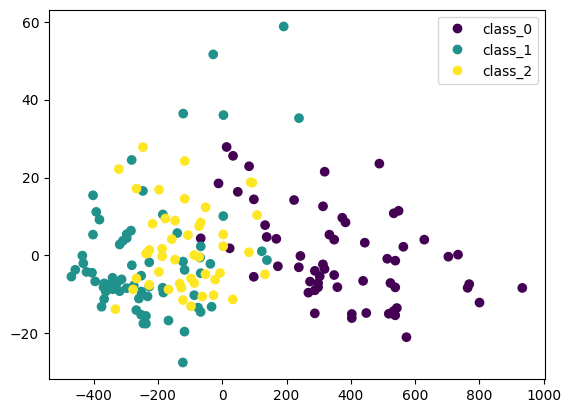

In [6]:
plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

We observe that calss 1 is segregated but there is still overlap b/w 1 & 2
continue reading...

We can do better, check this out 👇

PCA is sensitive to the scale!
Let's see if normalizing each feature by StandardScaler helps!

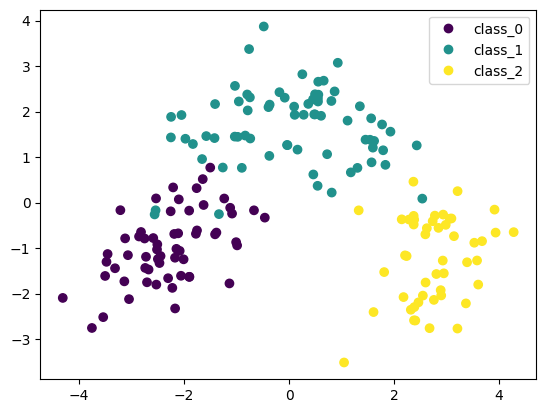

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Normalise the data
scaler = StandardScaler()
scaler.fit(X)
X_normalised = scaler.transform(X)

# Apply PCA now
pca.fit(X_normalised)

# transform the data using the PCA object
X_transformed = pca.transform(X_normalised)


plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

Congratulations 🎉
We can see a clear distinction amongst the classes!! 🙂